# Week 3 - Linear regression

 - hide cells 
 - ols 
 - equation to solve
 - metrics
 - polynomial regression - way of fitting more complex functions

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:

class OLS:
    def __init__(self):
        self.w = None
        self.x = None
        self.y = None
        pass
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        self.w = OLS.ols(x=x, y=y)
        pass

    @staticmethod
    def ols(x, y):
        XX = x.T.dot(x)
        Xy = x.T.dot(y)
        w = np.linalg.solve(XX,Xy)
        # solving the linear equation system is equivalent to copmuting XXi.dot(Xy) as follows:
        # XXi = np.inv(XX)
        # w = XXi.dot(Xy)
        return w
    
    def pred(self, x):
        return x.dot(self.w)

    def mse(self, x=None, y=None):
        if x is None:
            x = self.x
        if y is None:
            y = self.y
        y_pred = self.pred(x)
        residuals = y - y_pred
        mse = np.mean(residuals*residuals)
        return mse

    def score(self, x=None, y=None):
        return -self.mse(x=x, y=y)


In [7]:
class PolynomialRegression:

    @staticmethod
    def polynomial_design(x, degree=1):
        n = x.shape[0]
        X = np.ones((n,degree+1))
        for k in range(1,degree+1):
            X[:,k] = X[:,k-1] * x   
        return X

    def __init__(self, degree=1, linear_regression=None):
        if linear_regression is None:
            linear_regression=OLS()
        self.linear_regression = linear_regression
        self.degree = degree
        self.x = None
        
    def fit(self, x, y):
        self.x = x
        X = PolynomialRegression.polynomial_design(x,degree=self.degree)
        self.linear_regression.fit(x=X,y=y)

    def pred(self, x):
        X = PolynomialRegression.polynomial_design(x,degree=self.degree)
        return self.linear_regression.pred(x=X)

/tmp/ipykernel_21518/4083790330.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../datasets/weatherstations/GM000003342.csv', names = names)


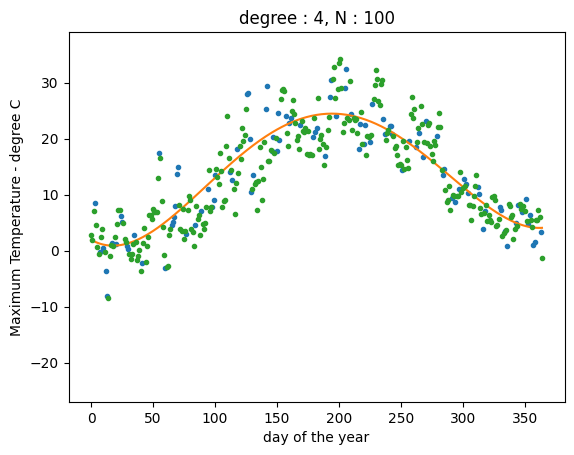

In [8]:
def load_data(year = None):
    """
    load data from a weather station in Potsdam
    """
    names = ['station', 'date' , 'type', 'measurement', 'e1','e2', 'E', 'e3']
    data = pd.read_csv('../datasets/weatherstations/GM000003342.csv', names = names)
    # convert the date column to datetime format
    data['date'] = pd.to_datetime(data['date'], format="%Y%m%d") # 47876 unique days
    types = data['type'].unique()

    tmax = data[data['type']=='TMAX'][['date','measurement']] # Maximum temperature (tenths of degrees C), 47876
    tmin = data[data['type']=='TMIN'][['date','measurement']] # Minimum temperature (tenths of degrees C), 47876
    prcp = data[data['type']=='PRCP'][['date','measurement']] # Precipitation (tenths of mm), 47876
    snwd = data[data['type']=='SNWD'][['date','measurement']] # Snow depth (mm), different shape
    tavg = data[data['type']=='TAVG'][['date','measurement']] # average temperature, different shape 1386
    arr = np.array([tmax.measurement.values,tmin.measurement.values, prcp.measurement.values]).T 

    df = pd.DataFrame(arr/10.0, index=tmin.date, columns=['TMAX', 'TMIN', 'PRCP']) # compile data in a dataframe and convert temperatures to degrees C, precipitation to mm

    if year is not None:
        df = df[pd.to_datetime(f'{year}-1-1'):pd.to_datetime(f'{year}-12-31')]
    
    df['days'] = (df.index - df.index.min()).days
    return df


year = 1900
df = load_data(year = year)


np.random.seed(2)
idx = np.random.permutation(df.shape[0])

idx_train = idx[0:100]
idx_test = idx[100:]

data_train = df.iloc[idx_train]
data_test = df.iloc[idx_test]

def plot_poly(degree = 3, N_train = 10):
    x_train = data_train.days.values[:N_train] * 1.0
    y_train = data_train.TMAX.values[:N_train]

    reg = PolynomialRegression(degree = degree)

    reg.fit(x=x_train,y=y_train)
    x_days = np.arange(365)
    y_days_pred = reg.pred(x_days)

    x_test = data_test.days.values * 1.0
    y_test = data_test.TMAX.values
    y_test_pred = reg.pred(x_test)

    fig = plt.figure()
    plt.plot(x_train,y_train,'.')
    plt.plot(x_days,y_days_pred)
    plt.ylim([-27,39])
    plt.xlabel("day of the year")
    plt.ylabel("Maximum Temperature - degree C")
    plt.title("degree : %i, N : %i" % (degree,N_train))
    return (fig, reg)


degree = 4
N_train = 100
x_train = data_train.days.values[:N_train] * 1.0
y_train = data_train.TMAX.values[:N_train]

reg = PolynomialRegression(degree =  degree)
reg.fit(x=x_train,y=y_train)

x_days = np.arange(365)
y_days_pred = reg.pred(x_days)
y_OLS_days_pred = reg.pred(x_days)

x_test = data_test.days.values * 1.0
y_test = data_test.TMAX.values
y_test_pred = reg.pred(x_test)

fig = plt.figure()
plt.plot(x_train,y_train,'.')
plt.plot(x_days,y_days_pred)
plt.plot(x_test,y_test, '.')
plt.ylim([-27,39])
plt.xlabel("day of the year")
plt.ylabel("Maximum Temperature - degree C")
plt.title("degree : %i, N : %i" % (degree,N_train))
plt.show()



In [9]:
import os
os.getcwd()

'/home/arek/Desktop/math4mlall/Math4ML/chapter3'


## p-norm linear regression


[[ True]
 [ True]]


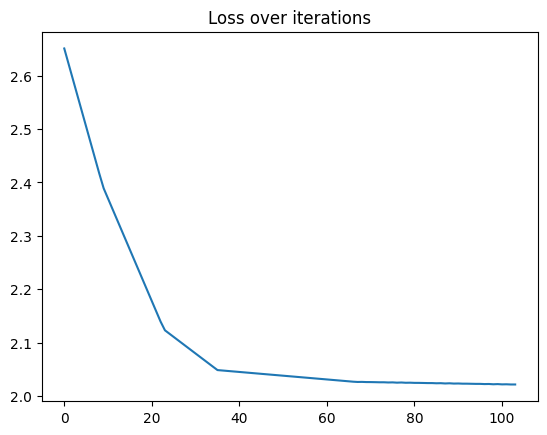

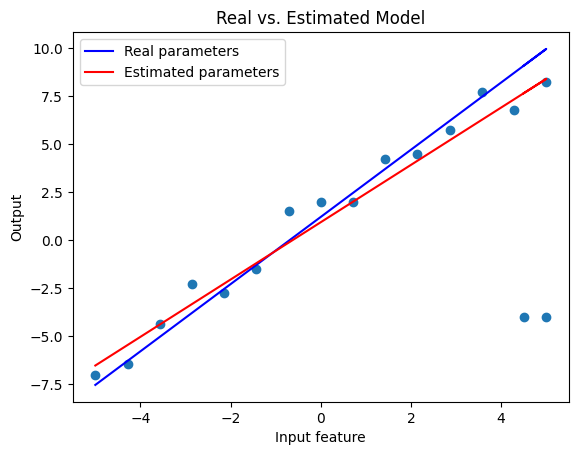

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(w):
    x = np.linspace(-5,5, 15)
    y = w[0]*x + w[1] + np.random.normal(size=x.shape)

    x = np.append(x, [5, 4.5])
    y = np.append(y, [-4, -4])

    x = x[:,None]
    y = y[:,None]

    X = np.hstack((x, np.ones_like(x)))
    return X, y


def get_loss(X,y,w,p):
    assert y.ndim==2, 'Wrong y dim'
    assert w.ndim==2, 'Wrong w dim'
    loss = np.sum(np.power(np.absolute(X@w-y),p)) / X.shape[0]
    return loss

def get_gradient(X,y,w,p):
    grad = p*(np.power(np.absolute((X@w-y)), p-1)*np.sign(X@w-y)).T@X /X.shape[0]
    return grad.T

def get_gradient_finite_differences(X,y,w,p,e):
    grad = np.zeros_like(w)
    for i in range(len(w)):
        w_diff = np.zeros_like(w)
        w_diff[i] += e/2
        grad[i] = (get_loss(X,y,w+w_diff,p) - get_loss(X,y,w-w_diff,p)) / e
    return grad


    
np.random.seed(42)
p = 1 


# Generate dataset
w_real = np.array([[1.75,1.2]]).T
X, y = generate_dataset(w_real)

# Compare the analytical gradient with the numerical gradient
w_check = np.array([[1.7,1]]).T
grad_analytical = get_gradient(X,y,w_check,p)
grad_numerical = get_gradient_finite_differences(X,y,w_check,p,0.001)
print(np.isclose(grad_analytical, grad_numerical))


# Train the model with the gradient descent method
w_solution=np.array([[1],[1]]) # starting solution
lr = 0.01 # learning rate
loss = []
e = 0.000001
for i in range(10000):
    loss.append(get_loss(X,y,w_solution,p))
    grad = get_gradient(X,y,w_solution,p)
    w_solution = w_solution - lr*grad
    if len(loss)>1 and abs(loss[-1]-loss[-2])< e:
            break
plt.figure(2)
plt.plot(loss)
plt.title("Loss over iterations")


plt.figure(3)
plt.scatter(X[:,0],y)
plt.plot(X[:,0], X@w_real, 'b-', label='Real parameters')
plt.plot(X[:,0],X@w_solution, 'r-', label='Estimated parameters')
plt.title("Real vs. Estimated Model")
plt.xlabel("Input feature")
plt.ylabel("Output")
plt.legend()
plt.show()





